**PROJECT | GROUP 5**

**Oguzhan Ozbek | Raghav Dheer**

**Sheridan ID #991656424 | Sheridan ID<???????>**

**PROG39051 - Machine Learning Techniques**

**Professor El Sayed Mahmoud**

**2025-04-17**

In [1]:
#IMPORTING PYTHON LIBRARIES AND UNDERSTANDING DATA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Motorvehicleinsurancedata.csv", delimiter=';')
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


In [2]:
#DATA CLEANING
print(f'Existince of NaN values: {df.isna().any().any()}')
print(f'\nNumber of existing rows: {len(df)}\n')
print(df.isna().sum())

df = df.drop('ID', axis=1)
df = df.drop('Date_lapse', axis=1)
df = df.drop('Date_last_renewal', axis=1)
df = df.drop('Date_next_renewal', axis=1)
df_clean = df.dropna().copy()

print('\nCleaning has been completed\n')
print(f'Existince of NaN values: {df_clean.isna().any().any()}')
print(f'\nNumber of existing rows: {len(df_clean)}\n')

Existince of NaN values: True

Number of existing rows: 105555

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

Cleaning has been comp

In [3]:
#FEATURE EXTRACTION
df_clean['Date_birth'] = pd.to_datetime(df_clean['Date_birth'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Age'] = (today - df_clean['Date_birth']).dt.days // 365

df_clean['Date_start_contract'] = pd.to_datetime(df_clean['Date_start_contract'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Length_contract'] = (today - df_clean['Date_start_contract']).dt.days // 365

df_clean['Date_driving_licence'] = pd.to_datetime(df_clean['Date_driving_licence'], format='%d/%m/%Y', errors='coerce')
today = pd.to_datetime("today")
df_clean['Length_licence'] = (today - df_clean['Date_driving_licence']).dt.days // 365

df_clean = df_clean.drop('Date_birth', axis=1)
df_clean = df_clean.drop('Date_start_contract', axis=1)
df_clean = df_clean.drop('Date_driving_licence', axis=1)

print(df_clean.info())
print(f'\nNumber of existing rows: {len(df_clean)}\n')

<class 'pandas.core.frame.DataFrame'>
Index: 95226 entries, 6 to 105554
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Distribution_channel  95226 non-null  int64  
 1   Seniority             95226 non-null  int64  
 2   Policies_in_force     95226 non-null  int64  
 3   Max_policies          95226 non-null  int64  
 4   Max_products          95226 non-null  int64  
 5   Lapse                 95226 non-null  int64  
 6   Payment               95226 non-null  int64  
 7   Premium               95226 non-null  float64
 8   Cost_claims_year      95226 non-null  float64
 9   N_claims_year         95226 non-null  int64  
 10  N_claims_history      95226 non-null  int64  
 11  R_Claims_history      95226 non-null  float64
 12  Type_risk             95226 non-null  int64  
 13  Area                  95226 non-null  int64  
 14  Second_driver         95226 non-null  int64  
 15  Year_matriculation    9

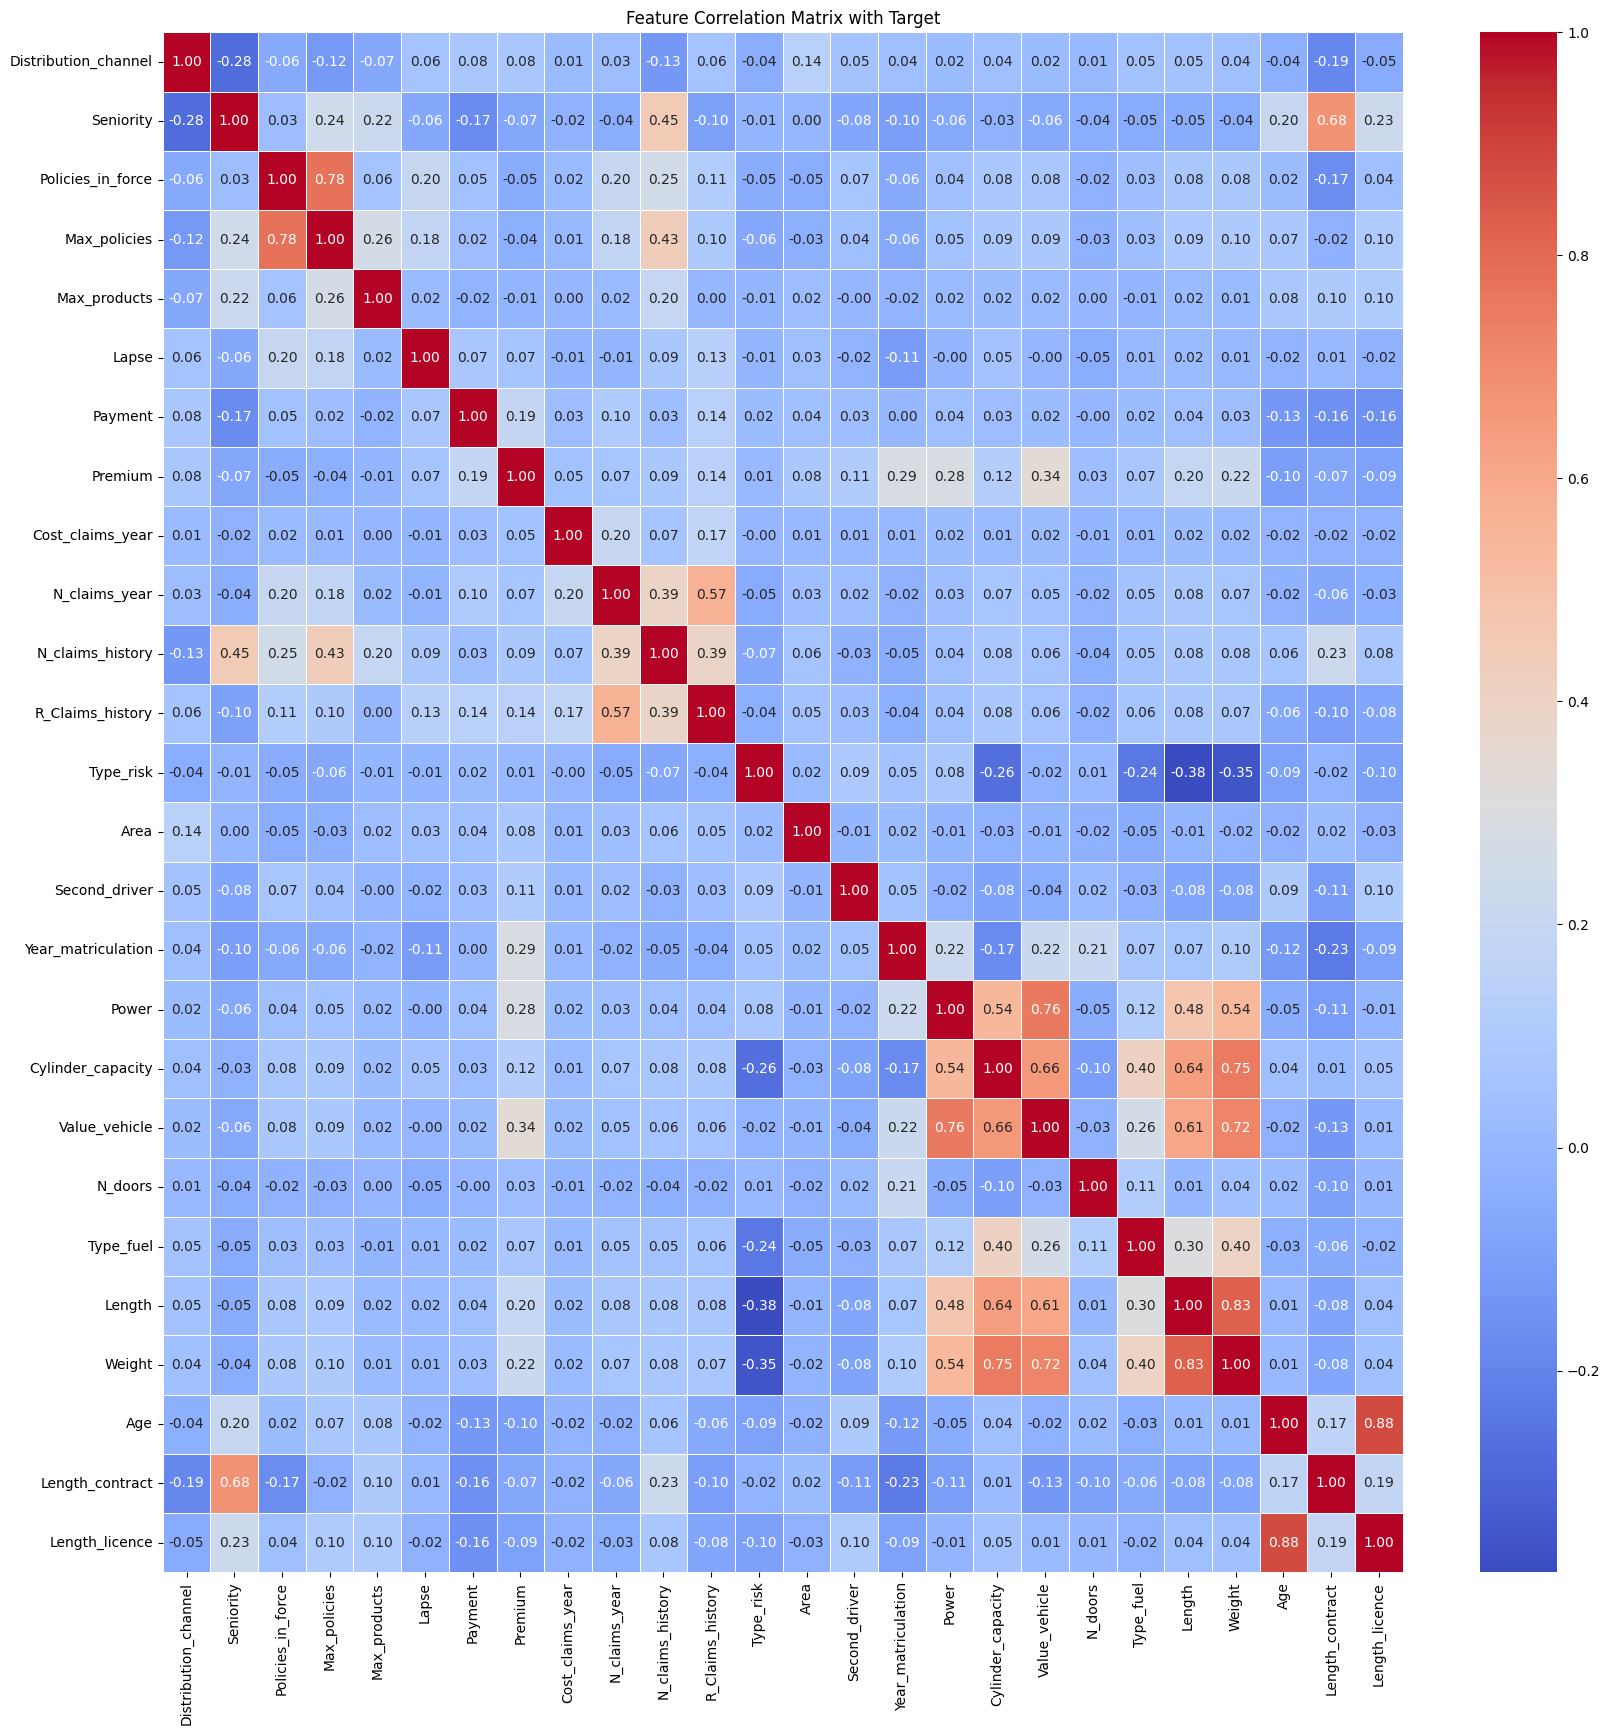

Top 14 features most correlated with Premium:
 Premium                 1.000000
Value_vehicle           0.340708
Year_matriculation      0.287014
Power                   0.282626
Weight                  0.216801
Length                  0.195998
Payment                 0.187958
R_Claims_history        0.142677
Cylinder_capacity       0.123152
Second_driver           0.107512
Age                     0.101008
Length_licence          0.090939
N_claims_history        0.085799
Area                    0.083524
Distribution_channel    0.081587
Name: Premium, dtype: float64


In [4]:
#LABEL ENCODING AND FEATURE SELECTION
df_clean['Type_fuel'] = df_clean['Type_fuel'].map({'P': 0, 'D': 1})
correlation_matrix = df_clean.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix with Target')
plt.show()

top15_correlated_features = correlation_matrix['Premium'].abs().sort_values(ascending=False).head(15)
print('Top 14 features most correlated with Premium:\n', top15_correlated_features)

In [5]:
#TRAIN-TEST SPLIT 
features = [
    'Value_vehicle', 'Year_matriculation','Power', 'Weight', 'Length',
    'Payment', 'R_Claims_history', 'Cylinder_capacity', 'Second_driver','Age',
    'Length_licence', 'N_claims_history', 'Area', 'Distribution_channel']

x = df_clean[features]
y = df_clean['Premium']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
#FEATURE SCALING
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#MODEL TRAINING
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [8]:
#MODEL TESTING AND EVALUATION
y_pred = model1.predict(x_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


R² Score: 0.2321
RMSE: 120.22
MAE: 78.80


In [9]:
#GETTING COEFFICIENTS
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model1.coef_
})

coefficients['Abs'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs', ascending=False).drop('Abs', axis=1)

print(f'Table of Coefficients:\n{coefficients}\n\nIntercept: {model1.intercept_}')

Table of Coefficients:
                 Feature  Coefficient
0          Value_vehicle    42.698071
1     Year_matriculation    25.202033
5                Payment    19.578972
8          Second_driver    14.240711
6       R_Claims_history    10.898000
7      Cylinder_capacity   -10.254075
12                  Area     7.658205
11      N_claims_history     6.972909
10        Length_licence    -5.968398
13  Distribution_channel     5.321147
4                 Length     5.021378
2                  Power     3.387022
3                 Weight    -2.663484
9                    Age    -1.632391

Intercept: 333.0323991118842


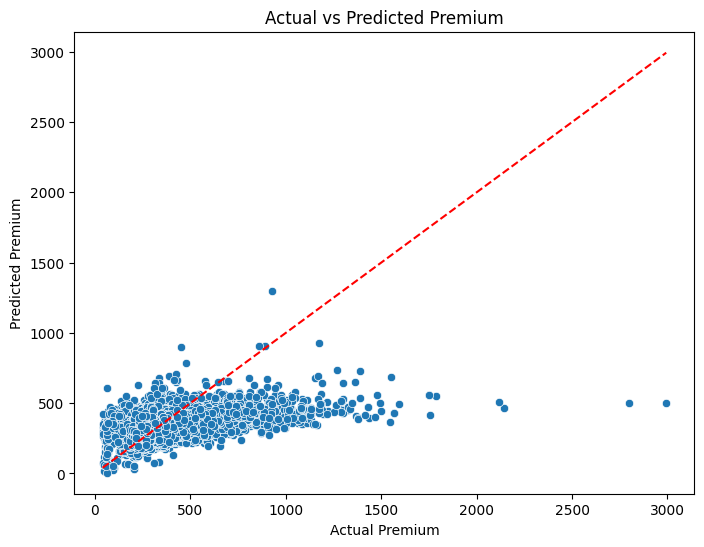

In [10]:
#PLOTTING ACTUAL VS PREDICTED PREMIUM
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Actual vs Predicted Premium")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

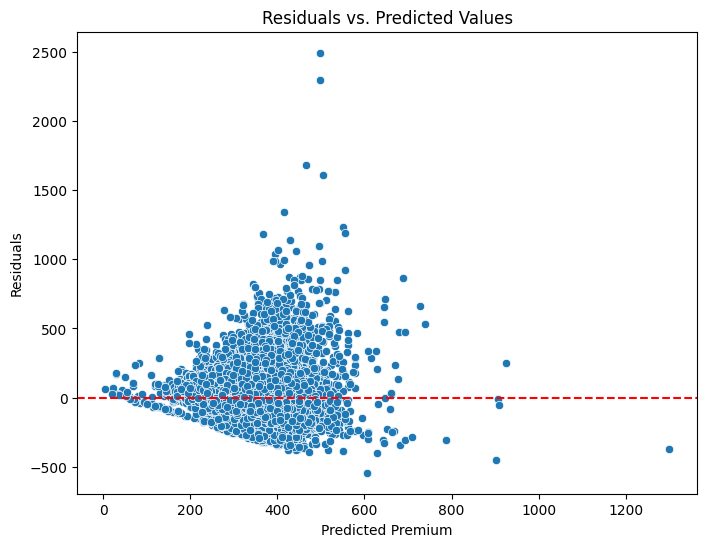

In [11]:
#PLOTTING RESIDUALS
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Premium")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

In [12]:
#RIDGE/LASSO REGULARIZATION
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(x_train, y_train)
print("Ridge R²:", ridge.score(x_test, y_test))

lasso = LassoCV(alphas=[0.01, 0.1, 1.0], random_state=42)
lasso.fit(x_train, y_train)
print("Lasso R²:", lasso.score(x_test, y_test))

Ridge R²: 0.23205453635668127
Lasso R²: 0.23204255693124498


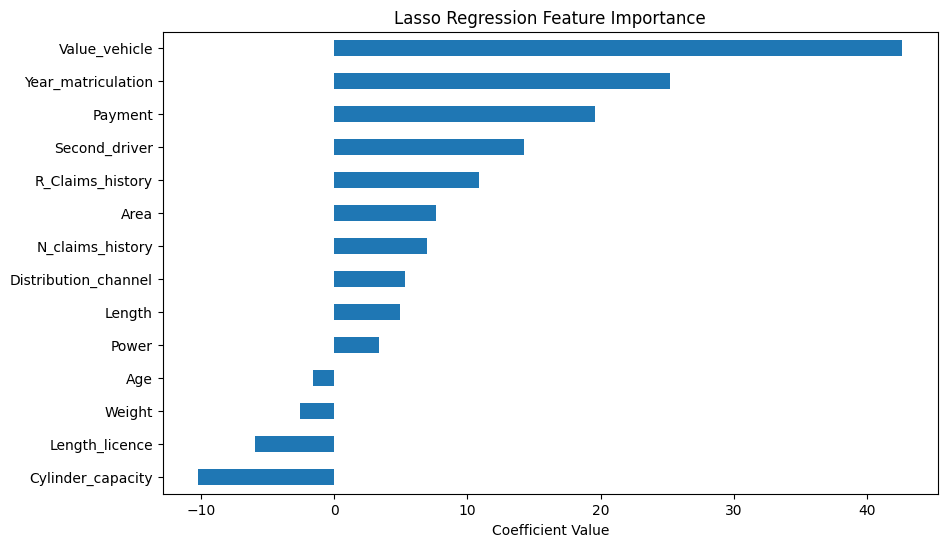

In [13]:
#PLOTTING FEATURE IMPORTANCE FROM LASSO COEFFICIENTS
lasso_coeffs = pd.Series(lasso.coef_, index=features)
plt.figure(figsize=(10, 6))
lasso_coeffs.sort_values().plot(kind='barh')
plt.title("Lasso Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()